In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def GetData():
    data = pd.read_csv('ml-latest-small/ratings.csv')
    num_users = data.userId.unique().shape[0]
    num_items = data.movieId.unique().shape[0]

    print('Number of users: %d, number of items: %d.' % (num_users, num_items))
    return data, num_users, num_items

Number of users: 610, number of items: 9724.
Matrix sparsity: 0.017000


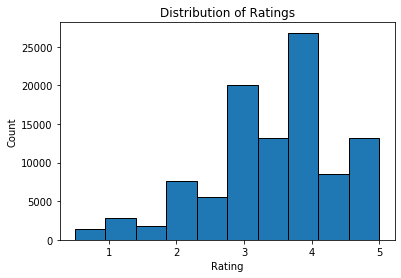

In [39]:
data, num_users, num_items = GetData()

sparsity = len(data) / (num_users * num_items)
print('Matrix sparsity: %f' % sparsity)

plt.hist(data['rating'], bins=10, ec='black')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

def GetRMatrix(data):
    X = data.values
    users = X[:,0]
    movies = X[:,1]

    movie_map = {}
    reverse_movie_map = {}
    new_id = 0
    for idx in range(len(movies)):
        item = int(movies[idx])
        if item not in movie_map:
            movie_map[item] = new_id
            reverse_movie_map[new_id] = item
            new_id += 1

    ratings = X[:,2]
    num_ratings = int(len(ratings))
    R = np.zeros((num_users, num_items))

    for i in np.arange(num_ratings):
        R[int(users[i]-1), movie_map[movies[i]]] = ratings[i]
        
    return R, movie_map, reverse_movie_map

R, movie_map, reverse_movie_map = GetRMatrix(data)

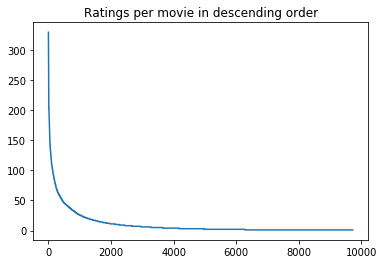

In [40]:
is_rated = R!=0
rat_per_movie = np.sum(is_rated,axis=0)
rat_per_movie

sort_rat_per_movie=np.sort(rat_per_movie)
sort_movie = np.argsort(rat_per_movie)


fig, ax = plt.subplots()

plt.plot(sort_rat_per_movie[::-1])

ax.set_title('Ratings per movie in descending order')
plt.show()

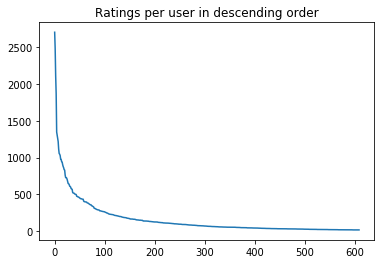

In [41]:
is_rated = R!=0
rat_per_user = np.sum(is_rated,axis=1)

sort_rat_per_user=np.sort(rat_per_user)
sort_user = np.argsort(rat_per_user)

fig, ax = plt.subplots()

plt.plot(sort_rat_per_user[::-1])

ax.set_title('Ratings per user in descending order')
plt.show()

0.20370103930563652


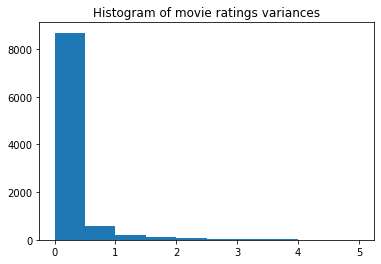

In [42]:
movie_vars = np.var(R, axis = 0)
print(np.mean(movie_vars))
fig, ax = plt.subplots()
plt.hist(movie_vars, bins = np.arange(0,5.5,0.5))
ax.set_title('Histogram of movie ratings variances')
plt.show()